In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 111)
pd.set_option('display.max_columns', 111)

In [3]:
data = pd.read_excel("../data/cov-data.xlsx")

In [4]:
print(data.shape)
data.head()

(5644, 111)


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
df = data.copy()

# Subsets selection

In [6]:
missing_rate = df.isna().sum() / df.shape[0]

In [7]:
blood_cols = df.columns[(missing_rate < 0.90) & (missing_rate > 0.88)]
viral_cols = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]

In [8]:
key_cols = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [9]:
df = df[[*key_cols, *blood_cols, *viral_cols]] # With viral

In [10]:
print(df.shape)
df.head()

(5644, 35)


,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN


# TrainTest

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

# Preprocessing

In [15]:
def encoding(_df):
    code = {
    'negative': 0,
    'positive': 1,
    'not_detected': 0,
    'detected': 1
    }
    for col in _df.select_dtypes('object'):
        _df[col] = _df[col].map(code)
    return _df

In [16]:
def feature_engineering(_df):
    _df["is_sick"] = _df[viral_cols].sum(axis=1) >= 1
    _df = _df.drop(viral_cols, axis=1)
    return _df

In [17]:
def imputation(_df):
    return _df.dropna(axis=0)

In [18]:
def preprocessing(_df: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame):
    _df = encoding(_df)
    _df = feature_engineering(_df)
    _df = imputation(_df)
    return _df.drop('SARS-Cov-2 exam result', axis=1), _df['SARS-Cov-2 exam result']

In [19]:
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

In [20]:
print(X_train.shape)
X_train.head()

(487, 16)


,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),is_sick
543,18,1.358055,1.356092,-0.228491,-0.438097,1.142196,-0.517481,0.244149,0.275501,-0.223767,0.178175,-0.793368,0.066045,0.987864,-0.005877,False
203,9,1.174947,0.854844,-1.019885,-1.784415,0.824849,-0.193377,-0.851210,-0.317234,-0.223767,-0.083183,1.608576,0.366488,0.042388,-0.448160,True
1624,10,1.037616,1.481403,-1.823841,0.347255,1.142196,0.966573,1.837398,-1.135374,-0.223767,0.387261,-0.835508,-0.454724,-0.377823,-0.978899,False
500,6,-0.038148,0.165628,0.914633,0.122869,-0.515058,1.316264,0.841616,0.044529,0.998070,1.275878,0.133698,1.007433,-0.456613,-0.801985,False
34,17,0.808730,1.042812,-0.278739,1.581381,0.701437,-0.261609,1.040773,0.000005,0.387152,0.439533,0.049419,-0.014074,-0.509139,-0.094334,True


# Modelisation

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [22]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [23]:
random_forest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
ada_boost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
svm = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
knn = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [24]:
models = {
    "RandomForest": random_forest,
    "AdaBoost": ada_boost,
    "SVM": svm,
    "KNN": knn,
}

## Evalution

In [25]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [26]:
def evaluation(_model, X, y, xtest, ytest):
    _model.fit(X, y)
    y_pred = model.predict(xtest)
    
    print(classification_report(ytest, y_pred))
    N, train_scores, test_scores = learning_curve(_model, X, y, cv=4,
                                               scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12,8))
    plt.subplot(2,1,1)
    sns.heatmap(confusion_matrix(ytest, y_pred), annot=True, cbar=False, cmap="Blues")
    plt.subplot(2,1,2)
    plt.plot(N, train_scores.mean(axis=1), label="Train Score")
    plt.plot(N, test_scores.mean(axis=1), label="Test Score")
    plt.legend()
    plt.grid()
    plt.show()
    

RandomForest
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        95
           1       0.60      0.38      0.46        16

    accuracy                           0.87       111
   macro avg       0.75      0.67      0.70       111
weighted avg       0.86      0.87      0.86       111



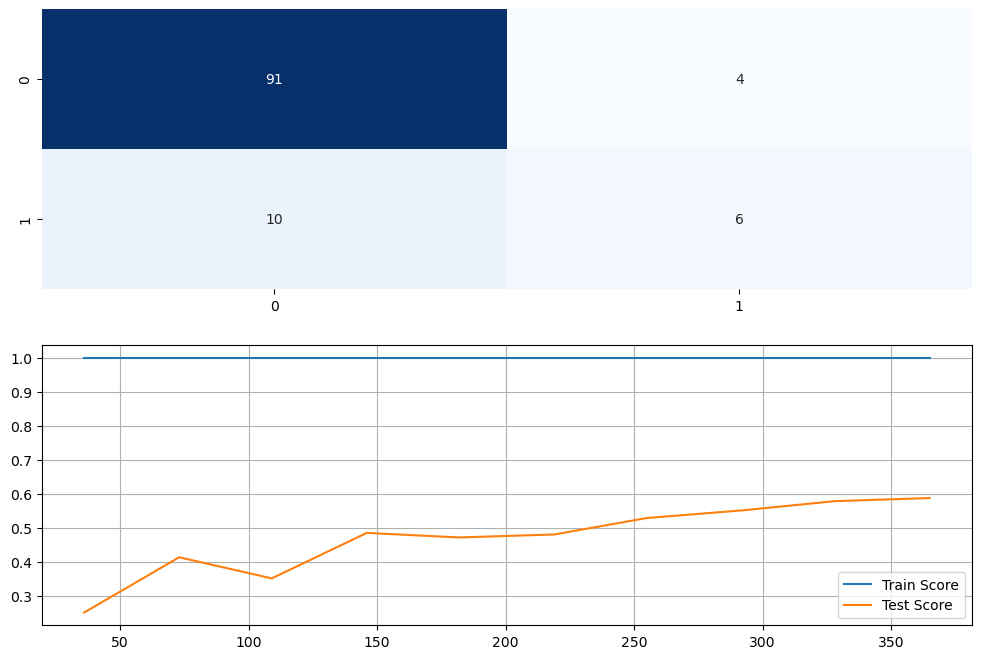

AdaBoost
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        95
           1       0.55      0.38      0.44        16

    accuracy                           0.86       111
   macro avg       0.72      0.66      0.68       111
weighted avg       0.85      0.86      0.85       111



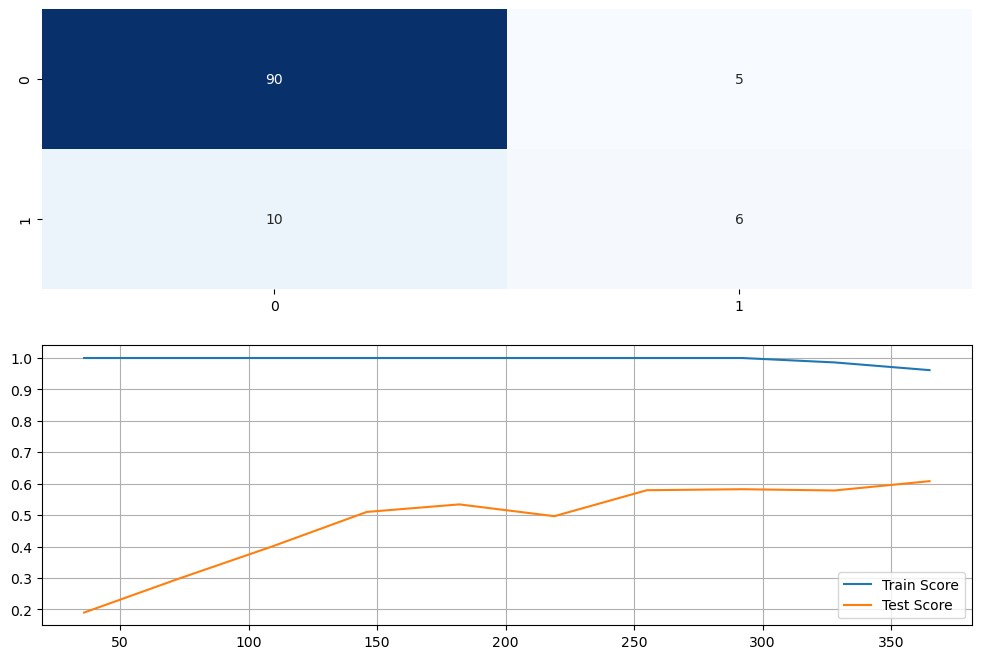

SVM
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1       0.64      0.44      0.52        16

    accuracy                           0.88       111
   macro avg       0.77      0.70      0.73       111
weighted avg       0.87      0.88      0.87       111



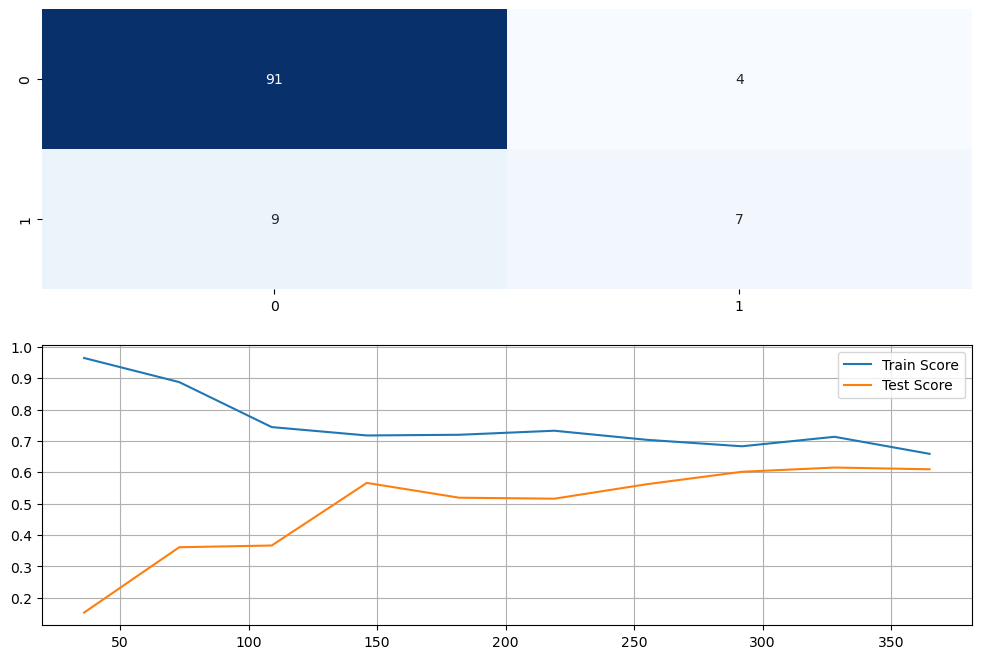

KNN
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        95
           1       0.53      0.50      0.52        16

    accuracy                           0.86       111
   macro avg       0.72      0.71      0.72       111
weighted avg       0.86      0.86      0.86       111



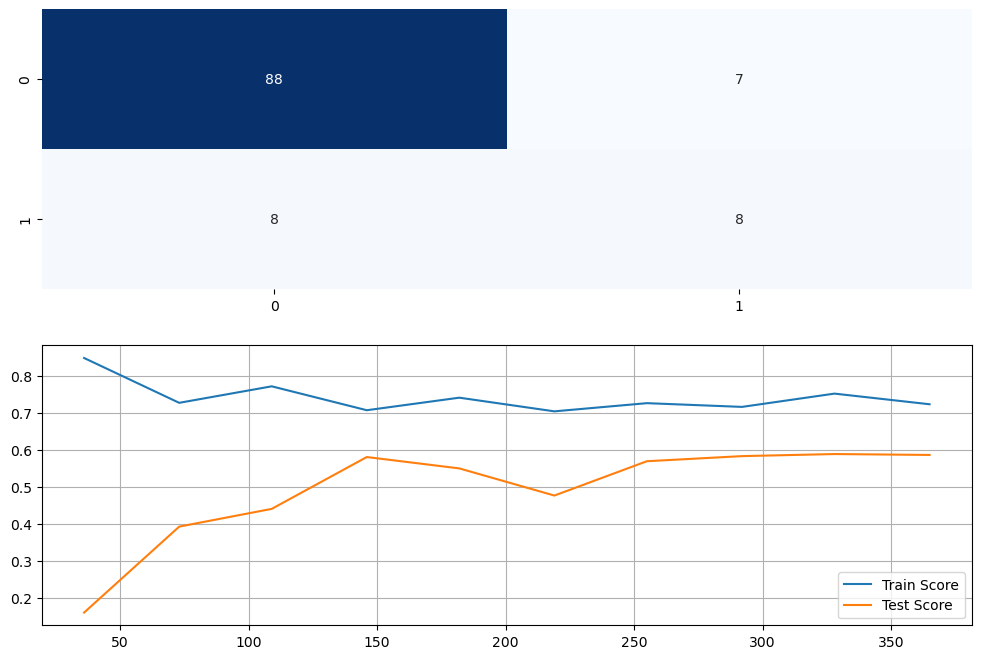

In [27]:
for name, model in models.items():
    print(name)
    evaluation(model, X_train, y_train, X_test, y_test)

### Variables selection

In [28]:
# Use without Pipeline
# pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar()

# Optimisation

In [29]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [30]:
svm

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [31]:
hyper_params = {
    'pipeline__polynomialfeatures__degree': [2, 3, 4],
    'pipeline__selectkbest__k': range(10, 40),
    'svc__gamma': [1e-3, 1e-4, 1e-5],
    'svc__C': [1, 10, 100, 1000]
}

In [32]:
# grid = GridSearchCV(svm, param_grid=hyper_params, scoring="recall", cv=5)
grid = RandomizedSearchCV(svm, hyper_params, scoring='recall', cv=5, n_iter=40)

In [33]:
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pipeline',
                                              Pipeline(steps=[('polynomialfeatures',
                                                               PolynomialFeatures(include_bias=False)),
                                                              ('selectkbest',
                                                               SelectKBest())])),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('svc', SVC(random_state=0))]),
                   n_iter=40,
                   param_distributions={'pipeline__polynomialfeatures__degree': [2,
                                                                                 3,
                                                                                 4],
                                        'pipeline__selectkbest__k': range(10, 40),
                                        'svc__C': [1, 10, 100, 1000],
                                        'svc__gamma': [0.001, 0.0001, 1e-05]},
                   scoring='recall')

In [34]:
print(grid.best_params_)
y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 29, 'pipeline__polynomialfeatures__degree': 2}
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        95
           1       0.50      0.38      0.43        16

    accuracy                           0.86       111
   macro avg       0.70      0.66      0.67       111
weighted avg       0.84      0.86      0.85       111



              precision    recall  f1-score   support

           0       0.92      0.93      0.92        95
           1       0.53      0.50      0.52        16

    accuracy                           0.86       111
   macro avg       0.72      0.71      0.72       111
weighted avg       0.86      0.86      0.86       111



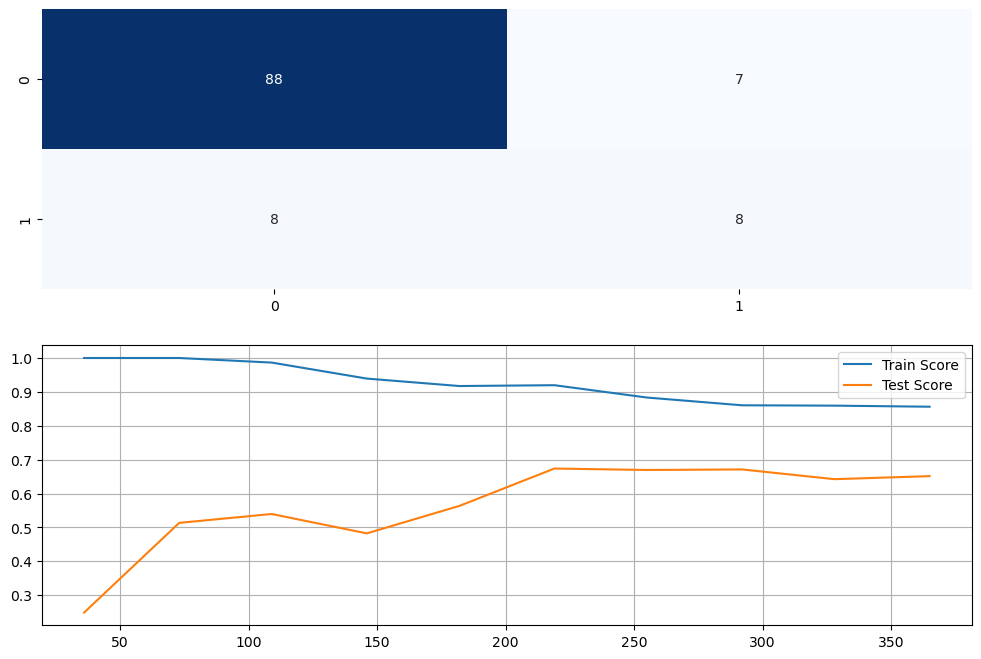

In [35]:
evaluation(grid.best_estimator_, X_train, y_train, X_test, y_test)

# Precision Recall Curve

In [36]:
from sklearn.metrics import precision_recall_curve

In [37]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

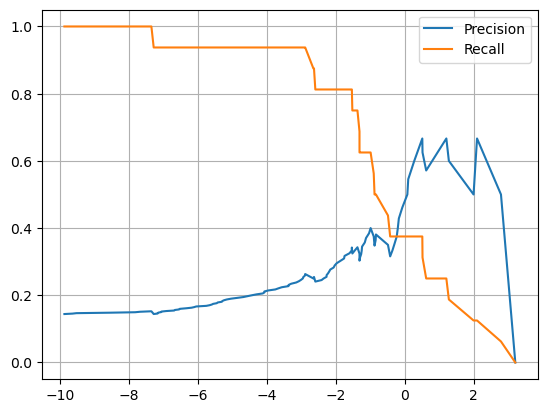

In [38]:
plt.figure()
plt.plot(threshold, precision[:-1], label='Precision')
plt.plot(threshold, recall[:-1], label='Recall')
plt.legend()
plt.grid()
plt.show()

In [39]:
def model_final(_model, X, threshold=0):
    return _model.decision_function(X) > threshold

In [40]:
y_pred = model_final(grid.best_estimator_, X_test, threshold=-1)

In [42]:
from sklearn.metrics import f1_score, recall_score

In [43]:
print(f1_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.48780487804878053
0.625
